<a href="https://colab.research.google.com/github/MWestberg3/bias-checker/blob/improve-accuracy-of-rnn/bias_checker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [73]:
import pandas as pd
import kagglehub as kh
import os

path = kh.dataset_download("subhankarpanda56/news-bias")

print("Path to dataset: ", path)

ConnectTimeout: HTTPSConnectionPool(host='www.kaggle.com', port=443): Max retries exceeded with url: /api/v1/datasets/view/subhankarpanda56/news-bias (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000002252DD9DCA0>, 'Connection to www.kaggle.com timed out. (connect timeout=5)'))

In [74]:
# Find the CSV file within the downloaded directory:
for filename in os.listdir(path):
  if filename.endswith(".csv"):
    csv_file_path = os.path.join(path, filename)
    break # Stop after finding the first CSV file


bias_raw_df = pd.read_csv(csv_file_path).iloc[:300]
print(bias_raw_df.head())

           topic                 source  bias  \
0      terrorism  New York Times - News     0   
1  supreme_court                    Vox     0   
2      education             Ezra Klein     0   
3       us_house         Breitbart News     2   
4    white_house    Guest Writer - Left     0   

                                                 url  \
0  http://www.nytimes.com/2016/09/20/nyregion/ahm...   
1  https://www.vox.com/policy-and-politics/2018/9...   
2  http://www.npr.org/blogs/thetwo-way/2014/05/06...   
3  http://www.breitbart.com/big-government/2017/0...   
4  https://www.cnn.com/2019/07/11/politics/donald...   

                                               title        date  \
0  Bomb Suspect Changed After Trip Abroad, Friend...  2016-09-20   
1  Why Susan Collins claims she’s being bribed ov...  2018-09-12   
2  Poll: Prestigious Colleges Won't Make You Happ...  2014-05-06   
3  Paul Ryan Reportedly Says No Chance for Border...  2017-09-12   
4  OPINION: Trump seeking ch

In [75]:
len(bias_raw_df)

300

<Axes: ylabel='ID'>

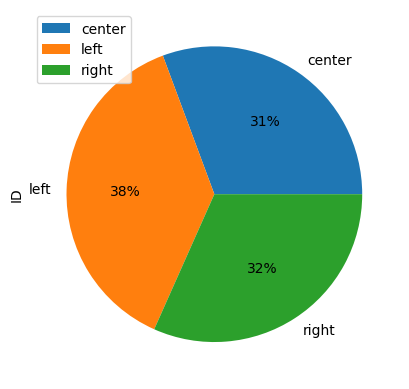

In [76]:
bias_raw_df.groupby('bias_text').count().plot(kind='pie', y='ID', autopct='%1.0f%%')

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bias_raw_df['content_original'], bias_raw_df['bias_text'], test_size=0.2, random_state=42)

In [78]:
X_train[0]

'Besides his most recent trip to Quetta, Mr. Rahami visited Karachi, Pakistan, in 2005. Both of those cities’ reputations have become entwined with the militant groups who have sheltered there: Karachi as a haven for the Pakistani Taliban and Al Qaeda, and Quetta as the headquarters of the exiled Afghan Taliban leadership. But both cities are also home to generations of Afghans who have fled violence in their home country.\n\nMuch about his New Jersey life did seem unremarkable. Amarjit Singh, a limousine driver, was friends with Mr. Rahami at Edison High School. The person he knew, he said, was a determined student with an abundance of friends and a string of girlfriends. “Everyone seemed to like him,” he said. “Smart, funny, humble.”\n\nHe viewed the teenage Mr. Rahami as the prototypical immigrant, teetering between two worlds. While he wore jeans and sweatshirts like his friends and worked at a Pathmark supermarket after school, he preferred Afghan music and prayed at the mosque on

# NLTK Pre-processing

In [79]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

# Tokenization
X_token_train = [word_tokenize(line)[:100] for line in X_train]
X_token_test = [word_tokenize(line)[:100] for line in X_test]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jobea\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jobea\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [80]:
print(X_token_train[0])

['The', 'Republican', 'Party', "'s", 'total', 'failure', 'to', 'make', 'even', 'cosmetic', 'changes', 'to', 'its', 'image', 'and', 'policy', 'agenda', 'last', 'year', 'has', 'at', 'this', 'point', 'become', 'the', 'kind', 'of', 'cliché-cum-running', 'joke', 'that', 'often', 'attaches', 'itself', 'to', 'accepted', 'truisms', 'in', 'American', 'politics', '.', 'Like', 'chucking', 'about', 'Bill', 'Clinton', "'s", 'inability', 'to', 'contain', 'himself', 'in', 'the', 'company', 'of', 'women', ',', 'or', 'noting', 'that', 'Dick', 'Cheney', 'actually', 'ran', 'the', 'show', 'during', 'George', 'W.', 'Bush', "'s", 'first', 'term', ',', 'observing', 'that', 'Republicans', 'have', 'failed', 'to', 'moderate', 'or', 'reinvent', 'themselves', 'after', 'losing', 'badly', 'in', '2012', 'is', 'the', 'kind', 'of', 'thing', 'even', 'sympathetic', 'political', 'wise', 'men', 'can', 'say']


In [81]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemma_X_train = [[lemmatizer.lemmatize(word) for word in line] for line in X_token_train]
lemma_X_test = [[lemmatizer.lemmatize(word) for word in line] for line in X_token_test]
print(lemma_X_train[0])

['The', 'Republican', 'Party', "'s", 'total', 'failure', 'to', 'make', 'even', 'cosmetic', 'change', 'to', 'it', 'image', 'and', 'policy', 'agenda', 'last', 'year', 'ha', 'at', 'this', 'point', 'become', 'the', 'kind', 'of', 'cliché-cum-running', 'joke', 'that', 'often', 'attache', 'itself', 'to', 'accepted', 'truism', 'in', 'American', 'politics', '.', 'Like', 'chucking', 'about', 'Bill', 'Clinton', "'s", 'inability', 'to', 'contain', 'himself', 'in', 'the', 'company', 'of', 'woman', ',', 'or', 'noting', 'that', 'Dick', 'Cheney', 'actually', 'ran', 'the', 'show', 'during', 'George', 'W.', 'Bush', "'s", 'first', 'term', ',', 'observing', 'that', 'Republicans', 'have', 'failed', 'to', 'moderate', 'or', 'reinvent', 'themselves', 'after', 'losing', 'badly', 'in', '2012', 'is', 'the', 'kind', 'of', 'thing', 'even', 'sympathetic', 'political', 'wise', 'men', 'can', 'say']


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jobea\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [82]:
nltk.download('stopwords')
from nltk.corpus import stopwords

# Remove stopwords
clear_X_train = [[word for word in line if word not in stopwords.words('english')] for line in lemma_X_train]
clear_X_test = [[word for word in line if word not in stopwords.words('english')] for line in lemma_X_test]
print(clear_X_train[0])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jobea\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['The', 'Republican', 'Party', "'s", 'total', 'failure', 'make', 'even', 'cosmetic', 'change', 'image', 'policy', 'agenda', 'last', 'year', 'ha', 'point', 'become', 'kind', 'cliché-cum-running', 'joke', 'often', 'attache', 'accepted', 'truism', 'American', 'politics', '.', 'Like', 'chucking', 'Bill', 'Clinton', "'s", 'inability', 'contain', 'company', 'woman', ',', 'noting', 'Dick', 'Cheney', 'actually', 'ran', 'show', 'George', 'W.', 'Bush', "'s", 'first', 'term', ',', 'observing', 'Republicans', 'failed', 'moderate', 'reinvent', 'losing', 'badly', '2012', 'kind', 'thing', 'even', 'sympathetic', 'political', 'wise', 'men', 'say']


In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initiate a tfidf vectorizer object
vectorizer = TfidfVectorizer(preprocessor=' '.join)
# Fitting the training dataset and transform it
X_train_tfidf = vectorizer.fit_transform(clear_X_train)
# Transform the test dataset
X_test_tfidf = vectorizer.transform(clear_X_test)

print(X_train_tfidf.shape)

(240, 4892)


In [84]:
print(X_train_tfidf[0])

  (0, 4146)	0.07743911877879167
  (0, 3418)	0.12887868087724458
  (0, 4853)	0.14238220590276962
  (0, 3766)	0.09813113154157153
  (0, 4493)	0.15310055670504655
  (0, 4554)	0.10573592246045294
  (0, 45)	0.11998413632775198
  (0, 1848)	0.15310055670504655
  (0, 3347)	0.11998413632775198
  (0, 3989)	0.15310055670504655
  (0, 3466)	0.14238220590276962
  (0, 2731)	0.12887868087724458
  (0, 1217)	0.08971290088209918
  (0, 3566)	0.14238220590276962
  (0, 4534)	0.1080360426032575
  (0, 2798)	0.0798079898204132
  (0, 285)	0.11998413632775198
  (0, 628)	0.12887868087724458
  (0, 4239)	0.0965285375060064
  (0, 3924)	0.14238220590276962
  (0, 1638)	0.12405906418161129
  (0, 352)	0.15310055670504655
  (0, 488)	0.1347774149838882
  (0, 3551)	0.15310055670504655
  (0, 4860)	0.11998413632775198
  :	:
  (0, 1608)	0.14238220590276962
  (0, 1817)	0.15310055670504655
  (0, 3587)	0.1080360426032575
  (0, 3210)	0.1347774149838882
  (0, 4127)	0.12887868087724458
  (0, 2322)	0.15310055670504655
  (0, 2119)	0.

In [85]:
import gensim

D = gensim.corpora.Dictionary(clear_X_train)
print(D)

Dictionary<5062 unique tokens: ["'s", ',', '.', '2012', 'American']...>


In [86]:
train_indices = [[D.token2id[t] for t in line] for line in clear_X_train]
test_indices = [[D.token2id[t] if t in D else len(D) for t in line] for line in clear_X_test]

import torch
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence

train_tensor = pad_sequence([torch.tensor(line) for line in train_indices],
                            batch_first=True,
                            padding_value=len(D)+2)
test_tensor = pad_sequence([torch.tensor(line) for line in test_indices],
                           batch_first=True,
                           padding_value=len(D)+2)

X_train_seq = nn.functional.one_hot(train_tensor)
X_test_seq = nn.functional.one_hot(test_tensor)

print(X_train_seq.shape)
print(X_test_seq.shape)

torch.Size([240, 84, 5065])
torch.Size([60, 81, 5065])


# Baseline Models with sklearn

In [87]:
from sklearn.linear_model import RidgeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_train_tfidf, y_train)

RidgeClassifier()

In [88]:
ridge_classifier_prediction = ridge_classifier.predict(X_test_tfidf)

In [89]:
ridge_classifier_accuracy = accuracy_score(y_test, ridge_classifier_prediction)
ridge_classifier_f1 = f1_score(y_test, ridge_classifier_prediction, average='weighted')

print(f"Ridge Classifier Accuracy: {ridge_classifier_accuracy}")
print(f"Ridge Classifier F1 Score: {ridge_classifier_f1}")

Ridge Classifier Accuracy: 0.43333333333333335
Ridge Classifier F1 Score: 0.4271650961306134


In [90]:
dummy_classifer = DummyClassifier(strategy='most_frequent')
dummy_classifer.fit(X_train_tfidf, y_train)

DummyClassifier(strategy='most_frequent')

In [91]:
dummy_classifer_prediction = dummy_classifer.predict(X_test_tfidf)

dummy_classifer_accuracy = accuracy_score(y_test, dummy_classifer_prediction)
dummy_classifer_f1 = f1_score(y_test, dummy_classifer_prediction, average='weighted')

print(f"Dummy Classifier Accuracy: {dummy_classifer_accuracy}")
print(f"Dummy Classifier F1 Score: {dummy_classifer_f1}")

Dummy Classifier Accuracy: 0.4
Dummy Classifier F1 Score: 0.22857142857142856


# Torch RNN Models

## Baseline RNN

In [ ]:
# # Simple tensor operations
# import torch

# # Putting data into a tensor
# X_train_tensor = torch.tensor(X_train_tfidf.toarray()).float()
# X_test_tensor = torch.tensor(X_test_tfidf.toarray()).float()

In [92]:
import torch.nn as nn

class RNNNet(nn.Module):
    def __init__(self, input_size, hidden_size=128, num_of_classes=3):  # Default hidden layer size is 128 nodes
        super(RNNNet, self).__init__()
        self.hidden_size = hidden_size
        # Define the RNN layer
        self.rnn_layer = nn.RNN(input_size,
                                hidden_size,
                                batch_first=True,
                                nonlinearity='tanh')  # Use 'relu' or 'tanh'
        # Define the output layer
        self.output_layer = nn.Linear(hidden_size, num_of_classes)

    def forward(self, x):
        # Run the RNN layer and ignore the hidden state
        output, hidden = self.rnn_layer(x)  # `hidden` contains the final hidden state
        return self.output_layer(hidden[-1])  # Use the final hidden state


In [93]:
lr = 0.01 # Learning rate
epochs = 70 # Training epochs

input_size = X_train_seq.shape[-1] # Extract the last dimension

model = RNNNet(input_size).to("cuda:0")

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


In [94]:
import numpy as np
# Define the custom mapping
custom_mapping = {'left': 0, 'center': 1, 'right': 2}

# Map the y_train and y_test using the custom mapping
y_train_mapped = [custom_mapping[label] for label in y_train]
y_test_mapped = [custom_mapping[label] for label in y_test]

# Convert to numpy arrays if needed (optional for some models)
y_train_encoded = np.array(y_train_mapped)
y_test_encoded = np.array(y_test_mapped)

# Print the custom mapping (optional)
print(custom_mapping)  # {'left': 0, 'center': 1, 'right': 2}


{'left': 0, 'center': 1, 'right': 2}


In [95]:
model

RNNNet(
  (rnn_layer): RNN(5065, 128, batch_first=True)
  (output_layer): Linear(in_features=128, out_features=3, bias=True)
)

In [ ]:
# Putting labels in tensors
y_train_tensor = torch.LongTensor(y_train_encoded)
y_test_tensor = torch.LongTensor(y_test_encoded)

# Repeat the learning process for the number of epochs
for e in range(epochs):
    # Forward pass
    predictions = model(X_train_seq.float().to("cuda:0"))
    # Calculate the loss -- the squeeze ensures the dimensions are consistent
    loss = loss_func(torch.squeeze(predictions), y_train_tensor.to("cuda:0"))

    # Model clean gradient
    optimizer.zero_grad()
    # Model backward pass to get the gradient
    loss.backward()
    # Model updating weights
    optimizer.step()

    # Print the training process
    if e % 20 == 0:
        print("Epoch:", e, "loss:", loss.item())

In [ ]:
from sklearn import metrics

# Forward pass on test set
y_pred = model(X_test_seq.float().to("cuda:0"))

# Convert model output to predicted class indices
y_pred_classes = torch.argmax(y_pred, dim=1)

# Convert ground truth to numpy
y_test_numpy = y_test_tensor.cpu().numpy()

# Calculate accuracy
test_accuracy = metrics.accuracy_score(y_test_numpy, y_pred_classes.cpu().numpy())
print("Test Accuracy:", test_accuracy)




## LSTM

In [147]:
import torch.nn as nn

# Using super to use the net like a layer (inherit nn.Module)
class LSTMModel(nn.Module):
  def __init__(self, input_size, hidden_size=128, num_of_classes=3): # Default hidden_layer size is 128 nodes
    super(LSTMModel, self).__init__()
    self.hidden_size = hidden_size
    # Define the RNN layer as LSTM
    self.rnn_layer = nn.LSTM(input_size,
                             hidden_size,
                             num_layers=3,
                             batch_first=True)
    # Define the output layer
    self.output_layer = nn.Linear(hidden_size, num_of_classes)

  def forward(self, x):
      _, (hidden, _) = self.rnn_layer(x)  # Use the final hidden state
      return self.output_layer(hidden[-1])  # Output logits (no Softmax)



In [148]:
lr = 0.0001 # Learning rate
epochs = 1000 # Training epochs

input_size = X_train_seq.shape[-1] # Extract the last dimension


model = LSTMModel(input_size).to("cuda:0")

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [149]:
model

LSTMModel(
  (rnn_layer): LSTM(5065, 128, num_layers=3, batch_first=True)
  (output_layer): Linear(in_features=128, out_features=3, bias=True)
)

In [150]:
# Putting labels in tensors
y_train_tensor = torch.LongTensor(y_train_encoded)
y_test_tensor = torch.LongTensor(y_test_encoded)

# Repeat the learning process for the number of epochs
for e in range(epochs):
    # Forward pass
    predictions = model(X_train_seq.float().to("cuda:0"))
    # Calculate the loss -- the squeeze ensures the dimensions are consistent
    loss = loss_func(torch.squeeze(predictions), y_train_tensor.to("cuda:0"))

    # Model clean gradient
    optimizer.zero_grad()
    # Model backward pass to get the gradient
    loss.backward()
    # Model updating weights
    optimizer.step()

    # Print the training process
    if e % 20 == 0:
        print("Epoch:", e, "loss:", loss.item())

Epoch: 0 loss: 1.0982106924057007
Epoch: 20 loss: 1.0949625968933105
Epoch: 40 loss: 1.094315767288208
Epoch: 60 loss: 1.0916258096694946
Epoch: 80 loss: 1.0538334846496582
Epoch: 100 loss: 0.8209646344184875
Epoch: 120 loss: 0.4973851442337036
Epoch: 140 loss: 0.46908751130104065
Epoch: 160 loss: 0.42275917530059814
Epoch: 180 loss: 0.30651047825813293
Epoch: 200 loss: 0.11159130185842514
Epoch: 220 loss: 0.05717715248465538
Epoch: 240 loss: 0.04030265286564827
Epoch: 260 loss: 0.03408810868859291
Epoch: 280 loss: 0.01611855812370777
Epoch: 300 loss: 0.012171554379165173
Epoch: 320 loss: 0.010019171983003616
Epoch: 340 loss: 0.008501719683408737
Epoch: 360 loss: 0.00735435588285327
Epoch: 380 loss: 0.006447004619985819
Epoch: 400 loss: 0.00570972403511405
Epoch: 420 loss: 0.005101256538182497
Epoch: 440 loss: 0.004593254998326302
Epoch: 460 loss: 0.004163603764027357
Epoch: 480 loss: 0.0037962140049785376
Epoch: 500 loss: 0.0034794332459568977
Epoch: 520 loss: 0.0032046104315668344
Ep

In [152]:
# Forward pass on test set
y_pred = model(X_test_seq.float().to("cuda:0"))

print(y_pred)

# Convert model output to predicted class indices
y_pred_classes = torch.argmax(y_pred, dim=1)

# Convert ground truth to numpy
y_test_numpy = y_test_tensor.cpu().numpy()

# Calculate accuracy
test_accuracy = metrics.accuracy_score(y_test_numpy, y_pred_classes.cpu().numpy())
print("Test Accuracy:", test_accuracy)

f1 = f1_score(y_test_numpy, y_pred_classes.cpu(), average='weighted')
print(f"F1 Score: {f1}")


tensor([[-3.6547,  5.3795, -2.7750],
        [-3.8325,  5.4729, -2.7168],
        [-4.0388,  5.5568, -2.6227],
        [-3.8325,  5.4729, -2.7168],
        [-3.8325,  5.4729, -2.7168],
        [-3.9600,  4.2902, -1.0230],
        [-3.7598,  3.4158, -0.2619],
        [-3.1029,  4.9972, -2.8754],
        [-3.7598,  3.4158, -0.2619],
        [-4.2896,  5.4416, -2.1803],
        [-4.0388,  5.5568, -2.6227],
        [-4.0388,  5.5568, -2.6227],
        [-3.9600,  4.2902, -1.0230],
        [-4.0388,  5.5568, -2.6227],
        [-3.0600, -0.1265,  3.1741],
        [-4.1653,  4.9960, -1.6768],
        [-3.4069,  5.2235, -2.8340],
        [-4.0388,  5.5568, -2.6227],
        [-3.2093,  5.0810, -2.8659],
        [-3.7598,  3.4158, -0.2619],
        [-4.1653,  4.9960, -1.6768],
        [-4.2243,  5.5833, -2.4670],
        [-3.1401,  5.0273, -2.8731],
        [-4.0388,  5.5568, -2.6227],
        [-3.4069,  5.2235, -2.8340],
        [-3.0600, -0.1265,  3.1741],
        [-3.9600,  4.2902, -1.0230],
 

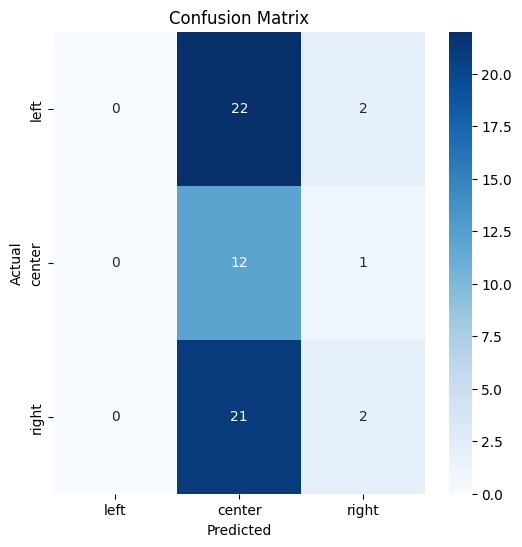

In [153]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Sample predicted labels (this would be from your model after predictions)
# Assuming you have your model predictions stored in y_pred
# For example:
y_pred = y_pred.cpu().detach().numpy()  # Model's raw outputs

# If the outputs are probabilities, convert them to class labels (using argmax if necessary)
y_pred_labels = np.argmax(y_pred, axis=1)  # Get the class index with the highest probability


# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["left", "center", "right"], yticklabels=["left", "center", "right"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
